# Построение графика нефти и USD/RUB из csv файла

Импортируем нужные библиотеки

In [23]:
import pandas as pd
import numpy as np

# %matplotlib  # Для отображения в отдельном окне построений matplotlib
# %matplotlib notebook  # Для интерактивного графика внутри ноутбука

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300  # default for me was 75

Загружаем данные

In [24]:
oil = pd.read_csv('../data/oilPrices.csv')  # загружаем файл oilPrice.csv
oil

,Date,Price
0,11-Jun-18,66.10
1,8-Jun-18,65.77
2,7-Jun-18,65.96
3,6-Jun-18,64.75
4,5-Jun-18,65.51
...,...,...
2120,8-Jan-10,82.74
2121,7-Jan-10,82.60
2122,6-Jan-10,83.12
2123,5-Jan-10,81.74


In [25]:
oil = oil.set_index(oil['Date'])  # Меняем индекс (чтобы индексом стала дата)
# oil = oil.set_index(pd.DatetimeIndex(oil['Date']))  # Меняем индекс и делаем её типом date
oil

,Date,Price
Date,,
11-Jun-18,11-Jun-18,66.10
8-Jun-18,8-Jun-18,65.77
7-Jun-18,7-Jun-18,65.96
6-Jun-18,6-Jun-18,64.75
5-Jun-18,5-Jun-18,65.51
...,...,...
8-Jan-10,8-Jan-10,82.74
7-Jan-10,7-Jan-10,82.60
6-Jan-10,6-Jan-10,83.12


Получилось две колонки с датами.
Нужно колонку с датой, которая не является индексо удалить.

In [26]:
oil = oil.drop('Date', 1)  # Удаляем ненужную колонку. 1 означает, что отбрасываем колонку а не индекс
oil

,Price
Date,
11-Jun-18,66.10
8-Jun-18,65.77
7-Jun-18,65.96
6-Jun-18,64.75
5-Jun-18,65.51
...,...
8-Jan-10,82.74
7-Jan-10,82.60
6-Jan-10,83.12


In [27]:
oil.index  # Посмотрим, что у нас в индексе

Index(['11-Jun-18', '8-Jun-18', '7-Jun-18', '6-Jun-18', '5-Jun-18', '4-Jun-18',
       '1-Jun-18', '31-May-18', '30-May-18', '29-May-18',
       ...
       '15-Jan-10', '14-Jan-10', '13-Jan-10', '12-Jan-10', '11-Jan-10',
       '8-Jan-10', '7-Jan-10', '6-Jan-10', '5-Jan-10', '4-Jan-10'],
      dtype='object', name='Date', length=2125)

В индексе объекты строк (str)
Нужно поменять на тип date

In [28]:
oil.index = pd.to_datetime(oil.index)  # Меняем индекс на тип date
oil.index

DatetimeIndex(['2018-06-11', '2018-06-08', '2018-06-07', '2018-06-06',
               '2018-06-05', '2018-06-04', '2018-06-01', '2018-05-31',
               '2018-05-30', '2018-05-29',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=2125, freq=None)

Теперь в индексе тип date
* * *

__Строим график__  
ось Х - это индекс (дата)  
ось Y - это цена  

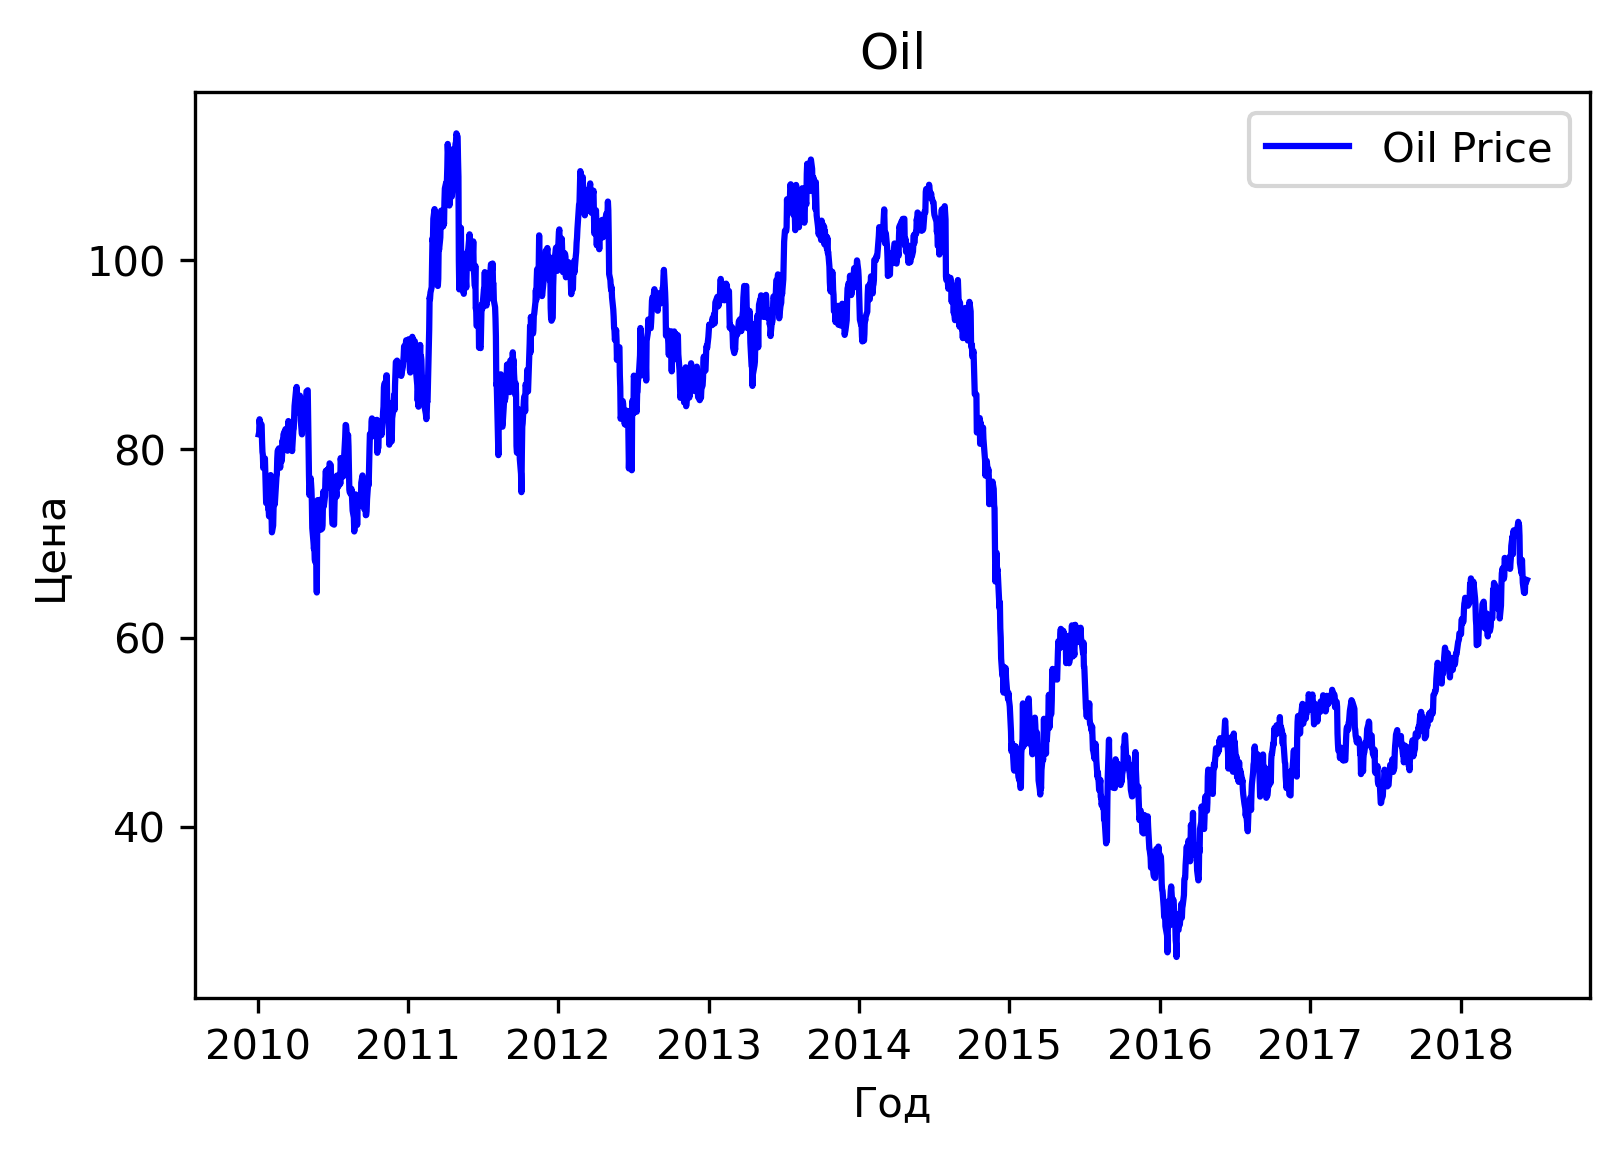

In [29]:
# ось Х
x_axis = oil.index
# ось Y
y_axis = oil['Price'].values

plt.plot(x_axis, y_axis, color='blue', label='Oil Price')
plt.legend()
plt.ylabel('Цена')
plt.xlabel('Год')
plt.title("Oil")
plt.show()

При построении нескольких инструментов будет повторение кода. Чтобы этого избежать пишем функцию.

In [30]:
def load_prices(file_name):
    """Функция считывает данные из принятого на вход файла. Возвращает DF"""
    data = pd.read_csv(file_name)  # Читам файл в DF
    data = data.set_index(pd.DatetimeIndex(data['Date']))  # Меняем индекс и тип индекса
    data = data.drop('Date', 1)  # Удаляем не нужный столбец
    return data

Проверим работу функции

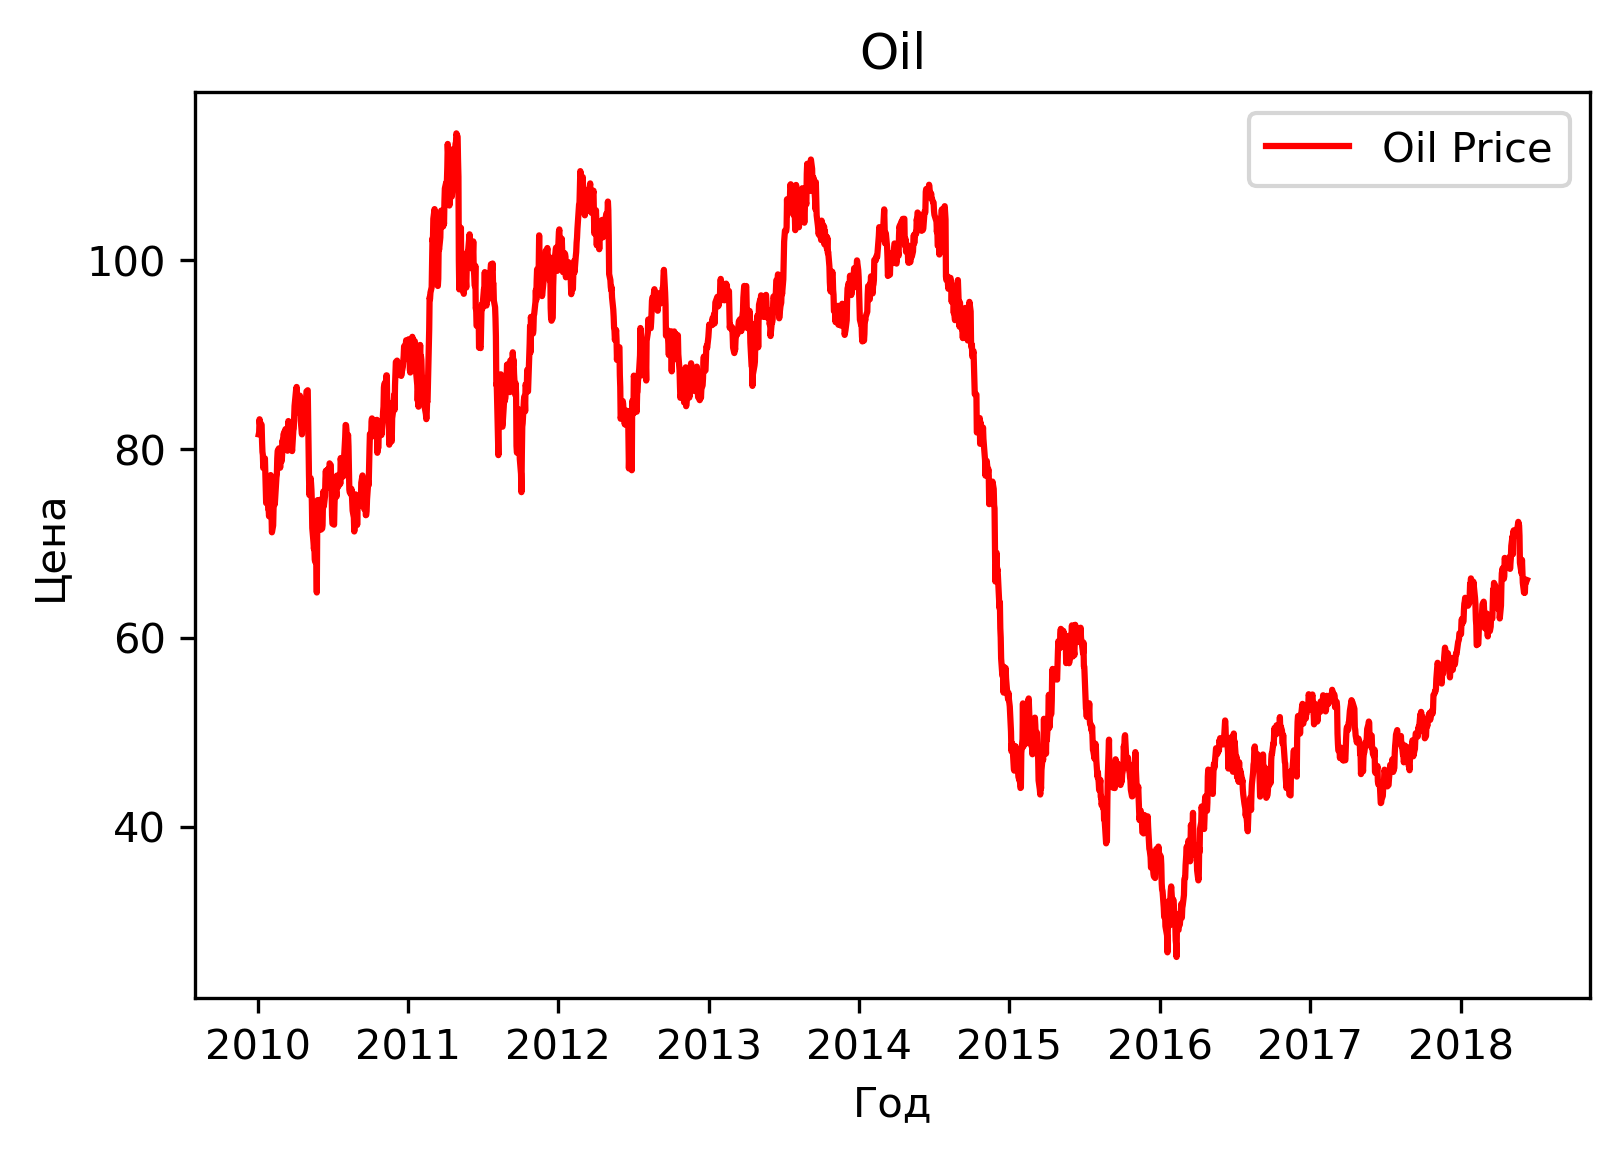

In [31]:
oil = load_prices('../data/oilPrices.csv')  # Вызываем функцию загрузки файла

# ось Х
x_axis = oil.index
# ось Y
y_axis = oil['Price'].values

# Строим график по данным из вызываемой функции
plt.plot(x_axis, y_axis, color='red', label='Oil Price')
plt.legend()
plt.ylabel('Цена')
plt.xlabel('Год')
plt.title("Oil")
plt.show()

Теперь считываем и загружаем данные в DF из двух файлов

In [32]:
oil = load_prices('../data/oilPrices.csv')  # Вызываем функцию загрузки файла oilPrices.csv
usd_rub_price = load_prices('../data/usdPrices.csv')  # Вызываем функцию загрузки файла usdPrices.csv

usd_rub_price  # Проверяем, что всё корректно загрузилось на новом DF (oil уже проверяли)

,Price
Date,
2018-06-15,63.1880
2018-06-14,62.6085
2018-06-13,62.5049
2018-06-11,62.8155
2018-06-09,62.5143
...,...
2010-01-08,29.8685
2010-01-07,30.1000
2010-01-06,30.1000


Количество строк в новом DF (USD/RUB) отличается от DF (Oil). Проверим их длину

In [33]:
# ось Х
x_axis = oil.index
# ось Y
oil_y_axis = oil['Price'].values
rub_y_axis = usd_rub_price['Price'].values

print(f'{len(oil_y_axis)=}')
print(f'{len(rub_y_axis)=}')

len(oil_y_axis)=2125
len(rub_y_axis)=2185


Нужно привести индексы двух DF в соответствие друг другу. 

In [34]:
# Т.к. индекс нефти меньше индекса USD/RUB, будем его использовать для обоих графиков
common_index = oil.index
usd_rub_price = usd_rub_price.reindex(common_index)  # Реиндексируем usd_rub_price по common_index
usd_rub_price  # Смотрим что получилось

,Price
Date,
2018-06-11,62.8155
2018-06-08,62.3193
2018-06-07,62.4179
2018-06-06,61.7848
2018-06-05,62.1456
...,...
2010-01-08,29.8685
2010-01-07,30.1000
2010-01-06,30.1000


In [35]:
# Проверка на присутствие "NaN" в DF usd_rub_price
nan_usd_rub_price = usd_rub_price.isnull().sum().sum()
print(nan_usd_rub_price)

20


Всё получилось, но некоторые строки в DF usd_rub_price имеют значение "NaN". Значениям "NaN" будем присваивать предыдущие значения из DF

In [36]:
# Заполняем "NaN" предыдущими значениями
usd_rub_price = usd_rub_price.fillna(method='backfill')

# Проверка на присутствие "NaN" в DF usd_rub_price
nan_usd_rub_price = usd_rub_price.isnull().sum().sum()
print(nan_usd_rub_price)

0


Всё хорошо, значений "NaN" нет в DF usd_rub_price
* * *

Проверим длины всех DF

In [37]:
# ось Х
x_axis = common_index
# ось Y
oil_y_axis = oil['Price'].values
rub_y_axis = usd_rub_price['Price'].values

# Проверка длины всех значений
print(f'{len(oil_y_axis)=}')
print(f'{len(rub_y_axis)=}')
print(f'{len(common_index)=}')

len(oil_y_axis)=2125
len(rub_y_axis)=2125
len(common_index)=2125


Длины одинаковые. Рисуем оба графика.

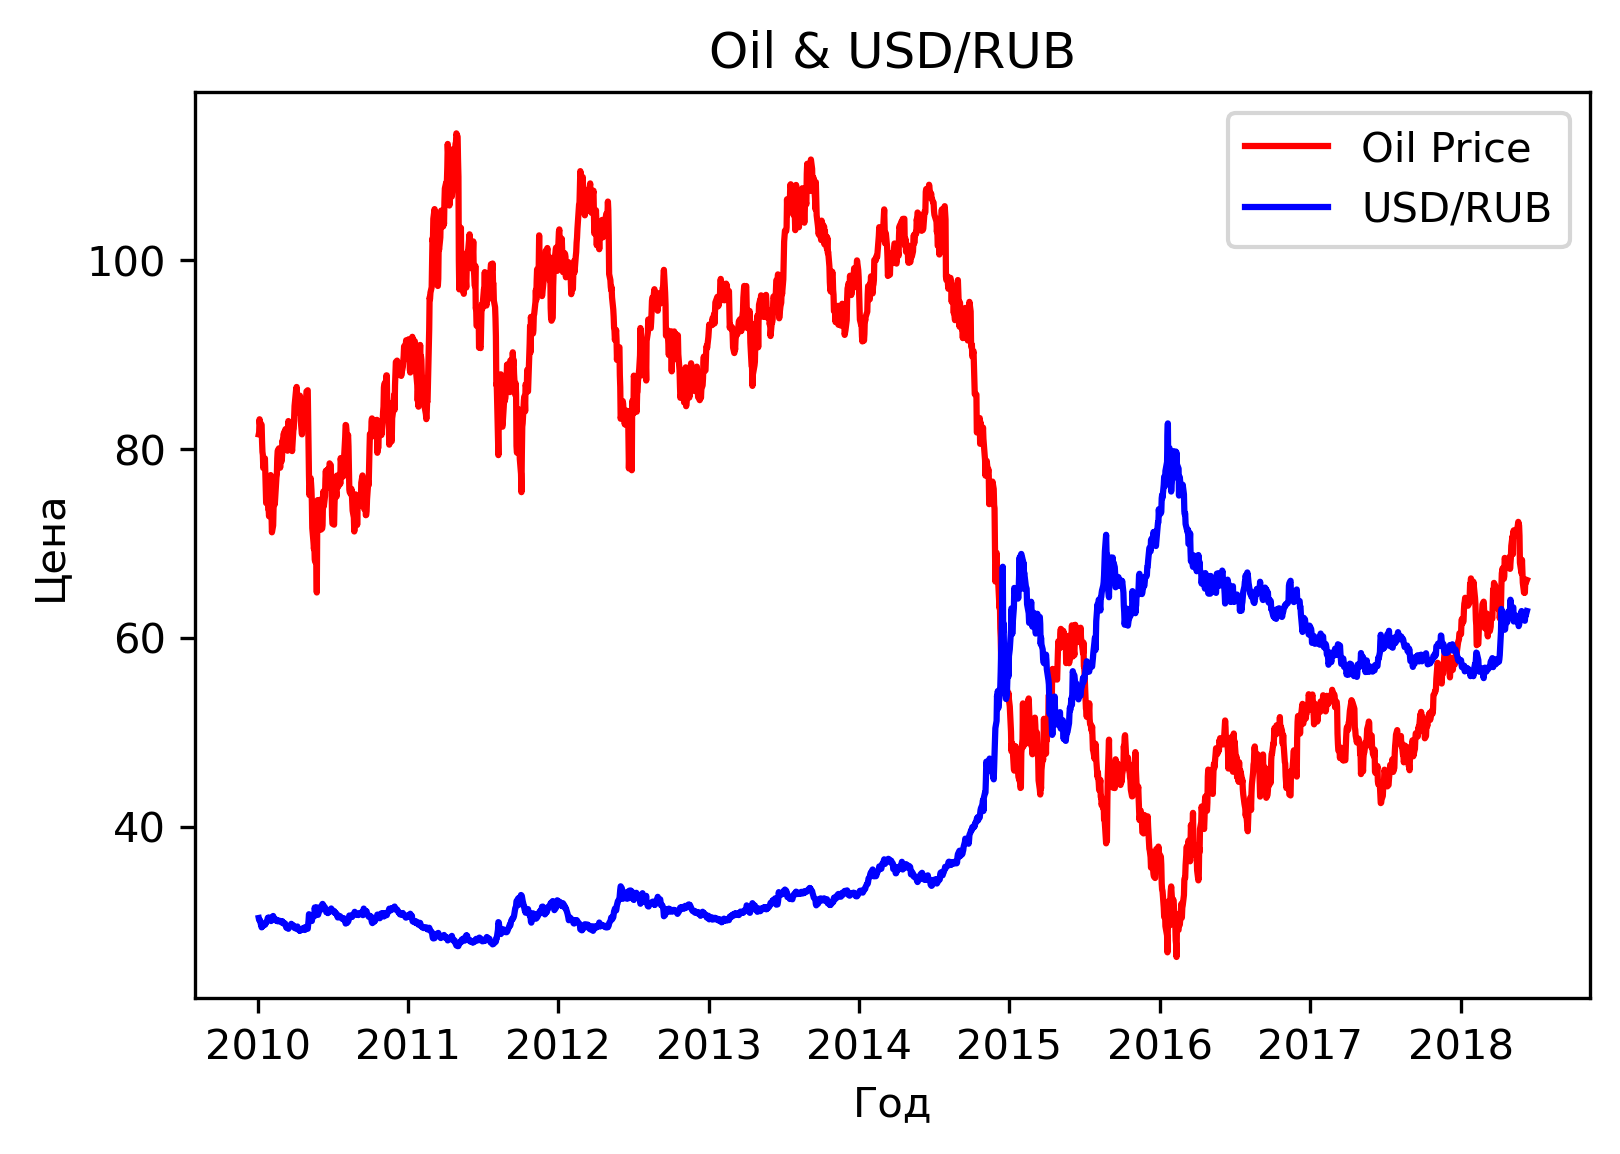

In [38]:
plt.plot(x_axis, oil_y_axis, color='red', label='Oil Price')
plt.plot(x_axis, rub_y_axis, color='blue', label='USD/RUB')
plt.legend()
plt.ylabel('Цена')
plt.xlabel('Год')
plt.title("Oil & USD/RUB")
plt.show()

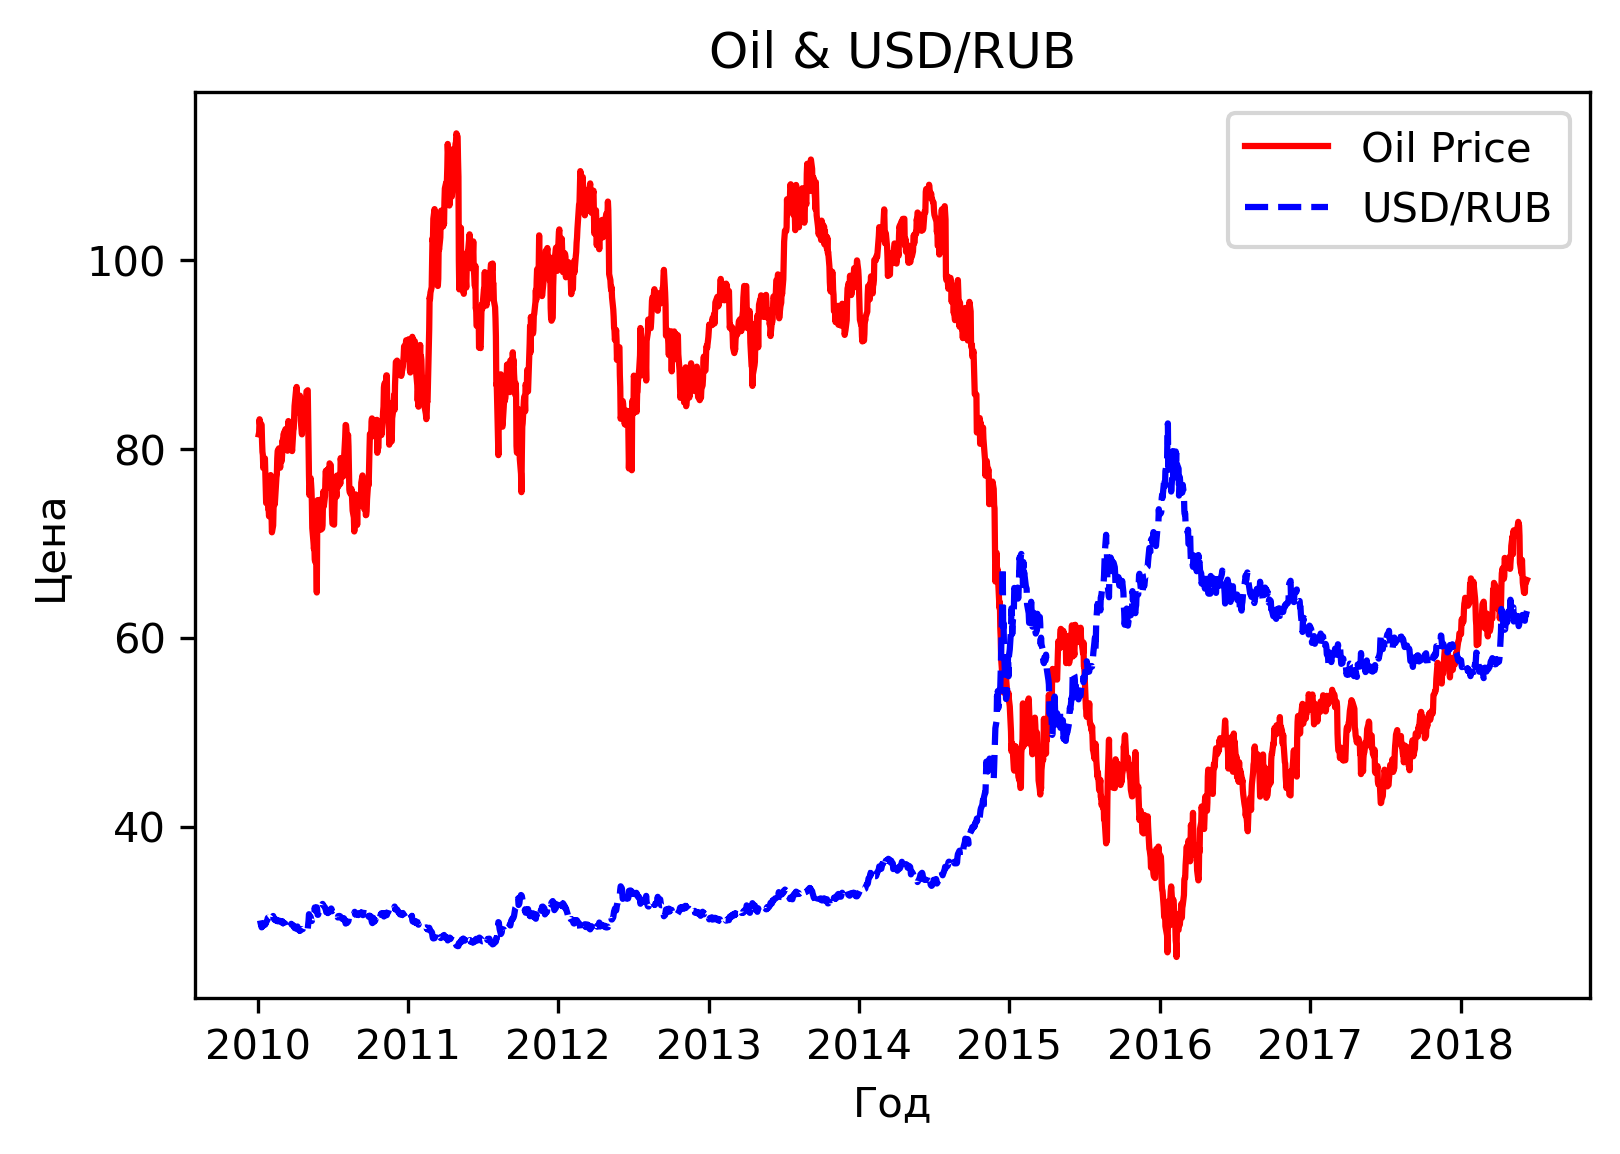

In [39]:
# Меняем график USD/RUB на пунктирно голубой
plt.plot(x_axis, oil_y_axis, color='red', label='Oil Price')
plt.plot(x_axis, rub_y_axis, 'b--', label='USD/RUB')
plt.legend()
plt.ylabel('Цена')
plt.xlabel('Год')
plt.title("Oil & USD/RUB")
plt.show()

# Нормализация данных и графика

На графике, который получился в итоге, движение цены начинается из разных точек. Это мешает анализу данных, ведь два графика в одном окне вывели для сравнения.  
Нужно нормализовать данные. Для этого создадим функцию нормализации. Цена к которой нормализуем данные должна быть самая первая по времени. 

Пробуем получить самую первую цену по времени. Она находится в самом конце нашего DataFrame

In [40]:
# Проверка получения самой первой цены по времени
price_at_t0_oil = oil.iloc[-1]['Price']
price_at_t0_usd_rub_price = usd_rub_price.iloc[-1]['Price']
print(f'{price_at_t0_oil=}, {price_at_t0_usd_rub_price=}')

price_at_t0_oil=81.52, price_at_t0_usd_rub_price=30.3175


Проверка удалась, будем использовать этот индекс в функции.

In [41]:
# price@t0 = 100%< >
def normalize_value(table, new_column, source_column):
    """
    Нормализует колонку (цены) относительно самого раннего по времени значения. Все последующие значения будут
    представлены в виде процентного изменения к этой цене
    :param table: Data Frame который нормализуем
    :param new_column: Название колонки с нормализованными данными
    :param source_column: Колонка с данными которые нормализуем
    :return: Data Frame с новой колонкой нормализованных данных
    """
    price_at_t0 = table.iloc[-1][source_column]  # Берем самое первое по времени значение (к нему нормализуем)
    table[new_column] = table.apply(lambda row: row[source_column] / price_at_t0, axis=1)  # axis=1 Указывает на колонку
    return table


Нормализуем DF oil и usd_rub_price

In [42]:
# Нормализация цены для корректного отображения на графике нескольких инструментов (новая колонка нормализованных цен)
usd_rub_price = normalize_value(usd_rub_price, 'Normalized value', 'Price')
usd_rub_price

,Price,Normalized value
Date,,
2018-06-11,62.8155,2.071922
2018-06-08,62.3193,2.055555
2018-06-07,62.4179,2.058808
2018-06-06,61.7848,2.037925
2018-06-05,62.1456,2.049826
...,...,...
2010-01-08,29.8685,0.985190
2010-01-07,30.1000,0.992826
2010-01-06,30.1000,0.992826


In [43]:
oil = normalize_value(oil, 'Normalized value', 'Price')
oil

,Price,Normalized value
Date,,
2018-06-11,66.10,0.810844
2018-06-08,65.77,0.806796
2018-06-07,65.96,0.809127
2018-06-06,64.75,0.794284
2018-06-05,65.51,0.803606
...,...,...
2010-01-08,82.74,1.014966
2010-01-07,82.60,1.013248
2010-01-06,83.12,1.019627


Новые колонки появились и отображают корректные значения нормализованных цен.
* * * 

Строим график из нормализованной цены.

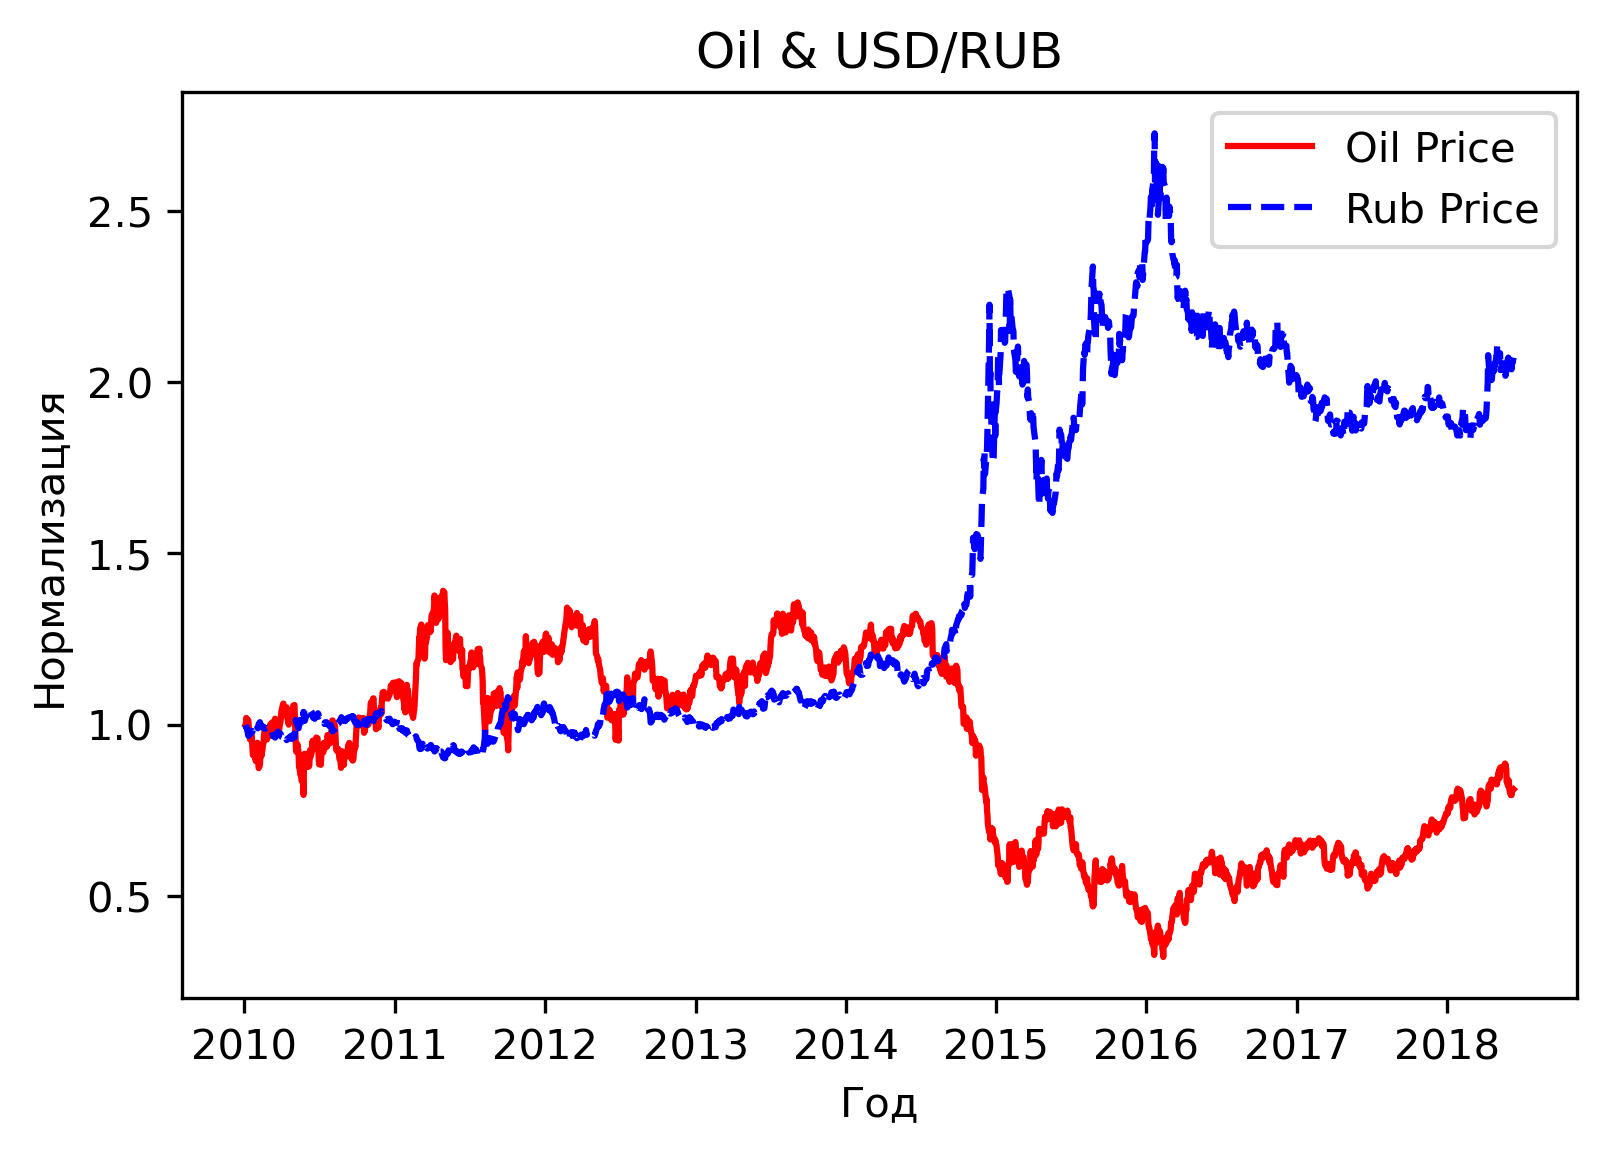

In [44]:
# По оси X будет index (date)
x_axis = oil.index
# По оси Y будет price
oil_y_axis = oil['Normalized value'].values
rub_y_axis = usd_rub_price['Normalized value'].values

# Построение графиков
plt.plot(x_axis, oil_y_axis, color='red', label='Oil Price')  # Вывод графика линией
plt.plot(x_axis, rub_y_axis, 'b--', label='Rub Price')  # color='blue'
plt.legend()  # Для показа label
plt.ylabel('Нормализация')
plt.xlabel('Год')
plt.title("Oil & USD/RUB")
plt.show()

# Зависит ли цена доллара от нефти?